<h1 style="text-align: center;">Predictive_Maintenance_Model</h1>


<img src="https://visualfactories.com/wp-content/uploads/2019/09/Predictive-Maintenance-4.0-Data-Logger-CANopen.png" width="800"/>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df=pd.read_csv('failure.csv')

##EDA (Exploratory Data Analysis)

In [3]:
df.shape

(124494, 12)

In [4]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [5]:
df.tail()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [7]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [8]:
abs(df.corr(numeric_only=True)['failure'].sort_values(ascending=False))#The p-value should be examined.

,failure
failure,1.000000
attribute7,0.119055
attribute8,0.119055
attribute4,0.067398
attribute2,0.052902
attribute5,0.002270
attribute1,0.001984
attribute9,0.001622
attribute6,0.000550
attribute3,0.000948


In [9]:
df.isnull().sum()

,0
date,0
device,0
failure,0
attribute1,0
attribute2,0
attribute3,0
attribute4,0
attribute5,0
attribute6,0
attribute7,0


In [10]:
df['failure'].value_counts()

,count
failure,
0,124388
1,106


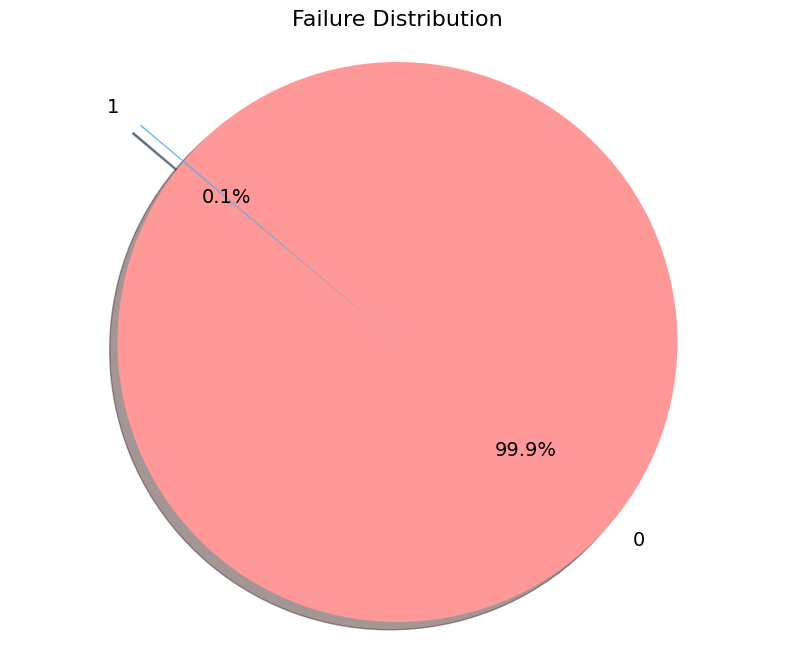

In [11]:
import matplotlib.pyplot as plt

# Failure sütunundaki değerlerin sayısını hesapla
failure_counts = df['failure'].value_counts()

# Pasta grafiği için daha çekici bir görselleştirme
plt.figure(figsize=(10, 8))
plt.pie(
    failure_counts,
    labels=failure_counts.index,
    autopct='%1.1f%%',
    colors=['#ff9999', '#66b3ff'],
    startangle=140,
    shadow=True,
    explode=(0.1, 0.1),  # Her iki dilimi de biraz patlat
    textprops={'fontsize': 14}  # Etiket font boyutu
)
plt.title('Failure Distribution', fontsize=16)
plt.axis('equal')  # Pasta grafiğinin dairesel görünmesini sağlar
plt.show()


In [12]:
#There is a significant size difference between the data points.

In [13]:
df.groupby('attribute8')['attribute7'].value_counts()#Do the 'attribute8' and 'attribute7' columns share the same data?

,,count
attribute8,attribute7,
0,0,123036
6,6,13
8,8,793
16,16,397
22,22,2
24,24,65
32,32,35
40,40,20
48,48,36


In [14]:
from scipy.stats import ttest_ind

In [15]:
results = []
for i in range(1, 10):
    attribute_name = f'attribute{i}'
    _,p=ttest_ind(df['failure'],df[attribute_name])
    results.append({'Attribute': attribute_name, 'P-Value': p})

results_df = pd.DataFrame(results)

In [16]:
results_df

,Attribute,P-Value
0,attribute1,0.000000e+00
1,attribute2,8.972133e-147
2,attribute3,1.864750e-79
3,attribute4,4.926071e-158
4,attribute5,0.000000e+00
5,attribute6,0.000000e+00
6,attribute7,1.556156e-43
7,attribute8,1.556156e-43
8,attribute9,1.985611e-116


<ipython-input-17-b916ed80c3a7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Attribute', y='P-Value', data=results_df, palette='viridis')


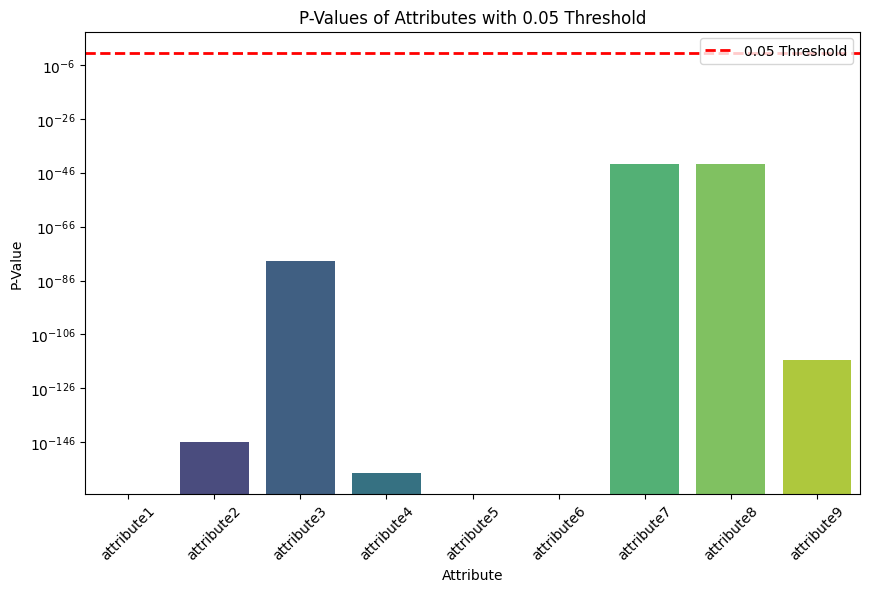

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Attribute', y='P-Value', data=results_df, palette='viridis')
plt.axhline(y=0.05, color='r', linestyle='--', linewidth=2, label='0.05 Threshold')
plt.title('P-Values of Attributes with 0.05 Threshold')
plt.xlabel('Attribute')
plt.ylabel('P-Value')
plt.xticks(rotation=45)
plt.yscale('log')
plt.legend( fontsize='10', loc='upper right', bbox_to_anchor=(1, 1))
plt.show()

Since the p-values are smaller than 0.05, these columns will be included in the model. However, it has been confirmed that attribute8 and attribute7 contain the same data. Therefore, one of them will be removed from the model.

## Modeling

In [18]:
x=df.drop(['date','device','attribute8','failure'],axis=1)
y=df[['failure']]

In [19]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   attribute1  124494 non-null  int64
 1   attribute2  124494 non-null  int64
 2   attribute3  124494 non-null  int64
 3   attribute4  124494 non-null  int64
 4   attribute5  124494 non-null  int64
 5   attribute6  124494 non-null  int64
 6   attribute7  124494 non-null  int64
 7   attribute9  124494 non-null  int64
dtypes: int64(8)
memory usage: 7.6 MB


In [20]:
x.shape

(124494, 8)

In [21]:
y.shape

(124494, 1)

SMOTE will be used to address the data imbalance in the 'Failure' column. SMOTE generates synthetic examples to augment the minority class, thereby enhancing the model's sensitivity to the minority class.

In [22]:
#pip install imblearn

In [23]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=42)
x, y = oversample.fit_resample(x, y)

In [24]:
x.shape

(248776, 8)

In [25]:
y.shape

(248776, 1)

In [26]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test(x, y):
    # Classification algorithms
    LR = LogisticRegression()
    ETR = ExtraTreeClassifier()
    GBR = GradientBoostingClassifier()
    kn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    xgb = XGBClassifier()
    ab = AdaBoostClassifier()
    rf = RandomForestClassifier()

    algos = [LR, ETR, GBR, kn, dt, xgb, ab, rf]
    algo_names = ['Logistic Regression', 'Extra Tree', 'Gradient Boosting', 'KNeighbors', 'Decision Tree',
                   'XGBClassifier', 'AdaBoost', 'Random Forest']

    # Splitting into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []

    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1_Score'], index=algo_names)

    for algo in algos:
        # Training the model and making predictions
        algo.fit(x_train, y_train)
        y_pred = algo.predict(x_test)

        # Calculating performance metrics
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, average='weighted'))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))

    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1_Score'] = f1

    # Sorting performance results
    rtable = result.sort_values('F1_Score', ascending=False)
    return rtable


In [27]:
algo_test(x,y)

,Accuracy,Precision,Recall,F1_Score
Random Forest,0.999015,0.999016,0.999015,0.999015
Decision Tree,0.997628,0.997630,0.997628,0.997628
XGBClassifier,0.996724,0.996731,0.996724,0.996724
Extra Tree,0.995478,0.995493,0.995478,0.995478
Gradient Boosting,0.961613,0.961675,0.961613,0.961610
AdaBoost,0.937857,0.938424,0.937857,0.937843
KNeighbors,0.852681,0.856537,0.852681,0.852234
Logistic Regression,0.693042,0.738756,0.693042,0.678168


## Result

SMOTE has been used to balance the data. With the Random Forest Classifier, a success rate of 99.89% has been achieved, demonstrating that our model can effectively predict failures.